In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
sb.set_palette("bright", 10)
%matplotlib inline

In [2]:
# Read prosper csv file
prosper = pd.read_csv('prosperLoanData (1).csv')

In [3]:
# View first few rows of the dataframe
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# See if there are any null values
prosper.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [5]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# Get the number of rows and columns
prosper.shape

(113937, 81)

In [7]:
# Get summary descriptive statistics of the dataframe
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### UNIVARIATE EXPLORATION

#### Lets see the distributions of some of the columns

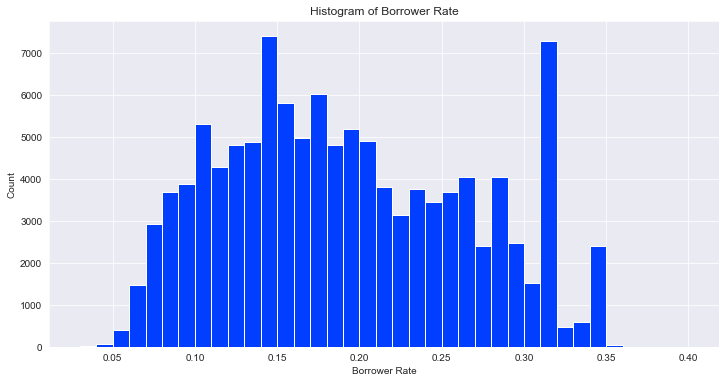

In [9]:
# Plot histogram of borrower rate to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0.03, 0.4+0.01, 0.01)
plt.hist(data = prosper, x = 'BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Histogram of Borrower Rate');

Bins are set at 0.01 and the distribution is unimodal. Most of the Borrower Rate are concentrated between 0.1 and 0.2. There is also another lower concentration between 0.2 and 0.3. A borrower rate a little above 0.3 has the highest values. We will check it out later

In [26]:
prosper.LenderYield.max()

0.4925

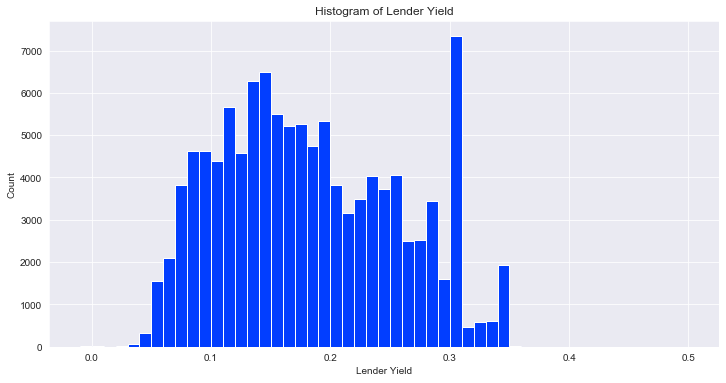

In [27]:
# Plot histogram of Lender yield to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(-0.01, 0.5+0.01, 0.01)
plt.hist(data = prosper, x = 'LenderYield', bins=bins)
plt.xlabel('Lender Yield')
plt.ylabel('Count')
plt.title('Histogram of Lender Yield');

Bins are set at 0.01 and the distribution is unimodal. Most of the Lender yield values are concentrated from below 0.1 and 0.2. There is also another lower concentration between 0.2 and 0.3. A borrower rate a little above 0.3 has the highest values. 

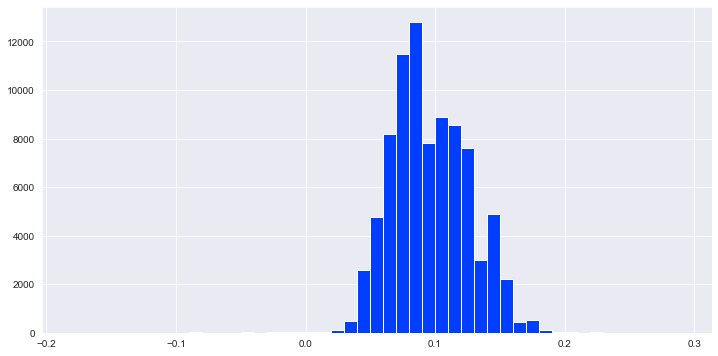

In [11]:
# Plot histogram of Estimated return to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(-0.18, 0.29+0.01, 0.01)
plt.hist(data = prosper, x = 'EstimatedReturn', bins=bins)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Histogram of Estimated Return');


The histogram of the estimated yield is unimodal. Most values are concentration 0.03 and 0.16. We cant do a log transform because there are negative values 

In [49]:
prosper.ProsperPrincipalBorrowed.value_counts()

4000.00     1857
5000.00     1512
3000.00     1201
2000.00     1180
10000.00     987
            ... 
13501.00       1
4887.05        1
13502.00       1
31101.00       1
2875.00        1
Name: ProsperPrincipalBorrowed, Length: 1442, dtype: int64

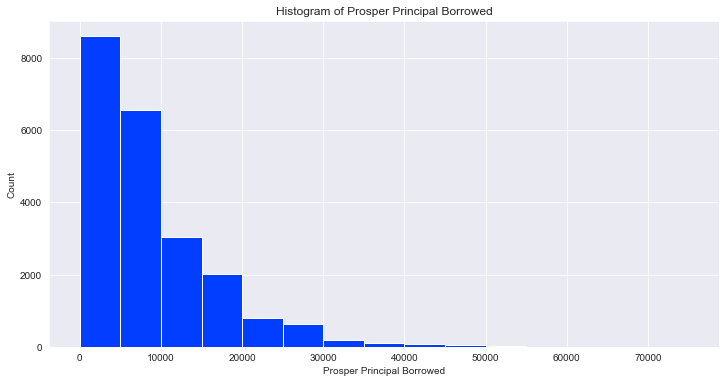

In [44]:
# Plot histogram of Prosper Principal Borrowed to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, 72499+5000, 5000)
plt.hist(data = prosper, x = 'ProsperPrincipalBorrowed', bins=bins)
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('Count')
plt.title('Histogram of Prosper Principal Borrowed');

The distribution is skewed to the right. Most loans principals are below 30000 with only a fraction above 30000. Might do a log transform later

In [56]:
# plt.figure(figsize = [12, 6])
# xlog_data = np.log10(prosper.ProsperPrincipalBorrowed)
# xlog_bin = np.arange(0, 5+0.5, 0.5)
# plt.hist(data=prosper, x=xlog_data)
# plt.xticks(xlog_bin)
# plt.title('Favorite and Retweet Count Log transform scatter plot')
# plt.xlabel('Favorite Count')
# plt.ylabel('Retweet Count');

In [ ]:
# Convert income range column to categorical type
level_order = ['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999', 'Not displayed', '$1-24,999', 'Not employed', '$0']
ord_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
prosper.IncomeRange = prosper.IncomeRange.astype(ord_cat)

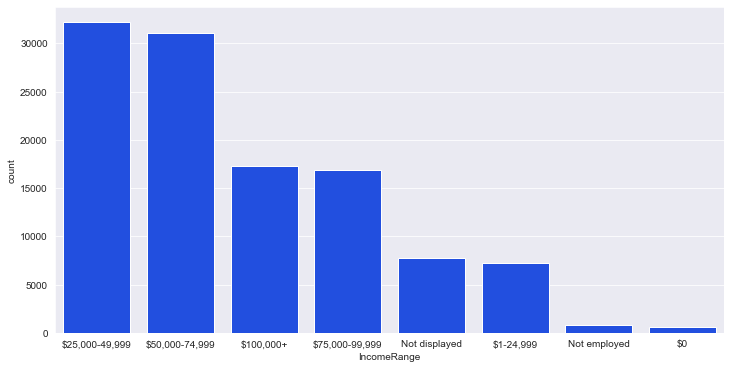

In [32]:
# Plot bar chart of income range
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
cat_order = prosper['IncomeRange'].value_counts().index
sb.countplot(data = prosper, x = 'IncomeRange', color = base_color, order = cat_order);

The income range 25k to 49k has the highest while 0 has the lowest

In [13]:
#np.log10(prosper['IncomeRange'].describe())

In [14]:
# #Lets perform a log transform since most values are skewed to the right
# bin_edges = 10 ** np.arange(0.8, np.log10(data.max())+0.1, 0.1)
# plt.hist(data, bins = bin_edges)
# plt.xscale('log')
# tick_locs = [10, 30, 100, 300, 1000, 3000]
# plt.xticks(tick_locs, tick_locs)


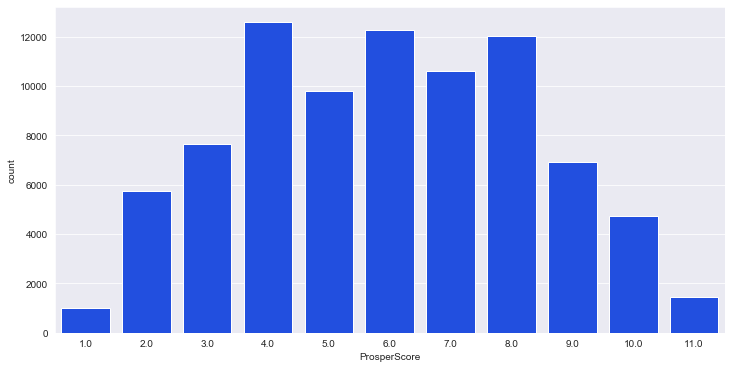

In [33]:
# Prosper score barplot
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'ProsperScore', color = base_color);

Prosper scores are concentrated between 4 and 8

In [16]:
# level_order = ['Premium Gasoline', 'Regular Gasoline']
# ord_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
# fe.fuelType = fe.fuelType.astype(ord_cat)

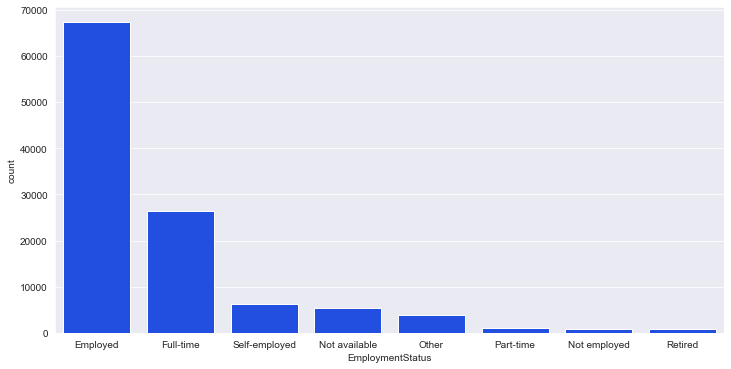

In [35]:
# Listing Employment Status barplot
plt.figure(figsize = [12, 6])
cat_order = prosper['EmploymentStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'EmploymentStatus', color = base_color, order=cat_order);

Obviously the employed and those with full time employment are the highest number of loan seekers

In [21]:
prosper.Occupation.value_counts()[:10]

Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Analyst                      3602
Sales - Commission           3446
Accountant/CPA               3233
Clerical                     3164
Name: Occupation, dtype: int64

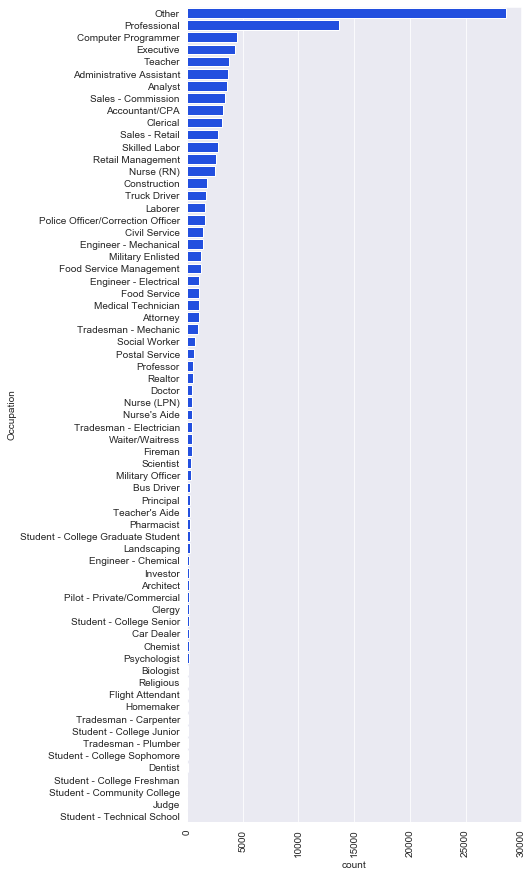

In [39]:
# Plot occupation barplot
plt.figure(figsize = [6, 15])
cat_order = prosper['Occupation'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, y = 'Occupation', color = base_color, order=cat_order);
plt.xticks(rotation=90);

Those listed as other have highest number of occupations followed by professional. Students are at the tail end of occupations listed

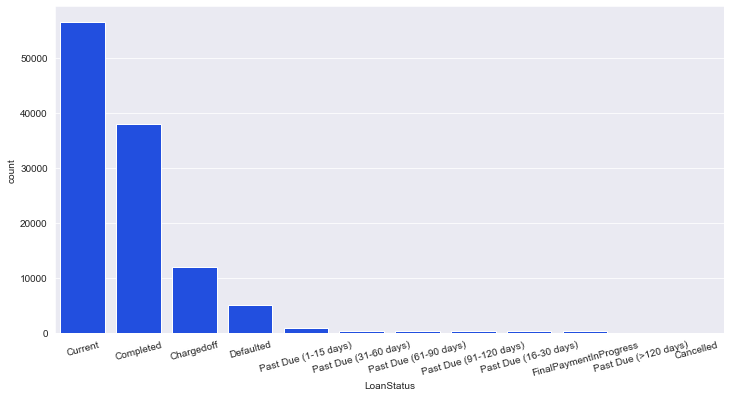

In [41]:
# Convert Loan Status to categorical data type
prosper.LoanStatus = prosper.LoanStatus.astype('category')
# Listing Category barplot
plt.figure(figsize = [12, 6])
cat_order = prosper['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'LoanStatus', color = base_color, order=cat_order)
plt.xticks(rotation=15);

Current loans are the highest. There is also an impressive number of completed loans

### BIVARIATE EXPLORATION

#### Now lets explore the various relationships between columns in dataframe

In [ ]:
# sb.heatmap(prosper.corr(), annot = True, fmt = '.2f', cmap = 'rocket_r', vmin = 0);
# plt.title('Correlation Heat Map');

In [ ]:
#sb.PairGrid(prosper).map(plt.scatter);

In [ ]:
#prosper.corr()

In [ ]:
# Change listing date to datetime type
prosper.ListingCreationDate =  pd.to_datetime(prosper['ListingCreationDate'])

In [ ]:
prosper['year'] = prosper['ListingCreationDate'].dt.year

In [ ]:
prosper.head()

### What factors contribute to loan deliquency

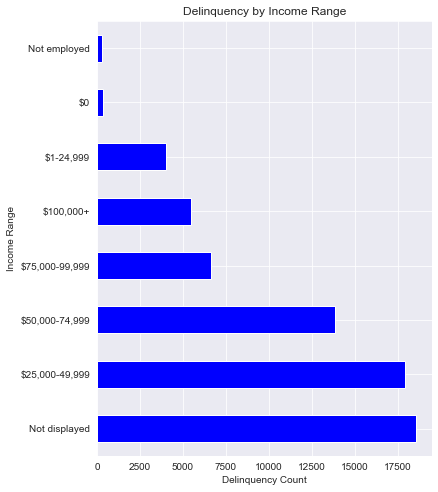

In [60]:
# Lets see how deliquency fares by income range
# Group by income range
income_del = prosper.groupby('IncomeRange').sum().CurrentDelinquencies.sort_values(ascending=False)
income_del
# Plot bar chart
plt.figure(figsize = [6, 8])
income_del.plot(kind="barh", color="blue")
plt.title('Delinquency by Income Range')
plt.xlabel('Delinquency Count')
plt.ylabel('Income Range');

Not displayed have highest delinquencies followed by the 25 to 50k. The least delinquent are the not employed and 0 income probably because they arent given loans in the first place. For those earning 25k up to 100k plus, delinquencies keep declining as income range increases. The only exception is those earning 24k or less who seem to have less delinquency than even the highest 100k income range.

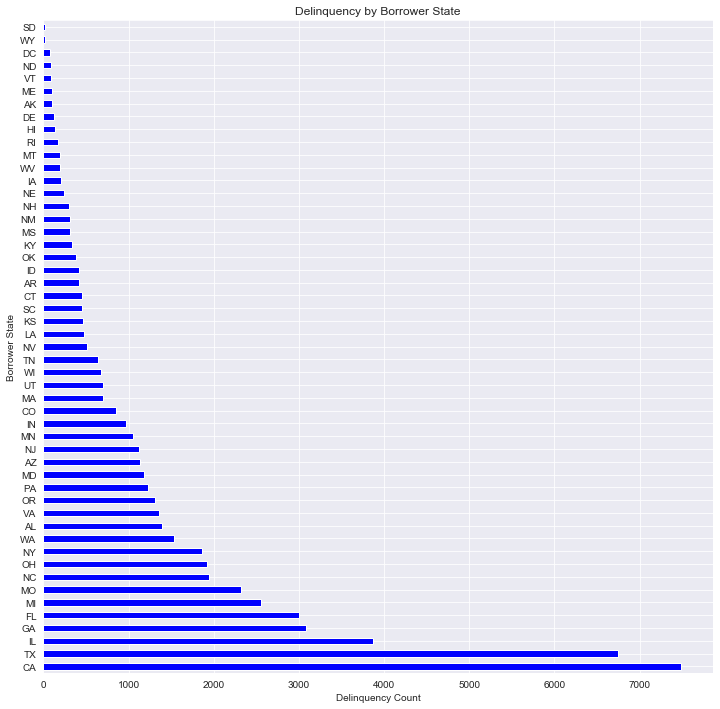

In [62]:
# Delinquent loans by borrower state
#Convert to categorical
prosper.BorrowerState = prosper.BorrowerState.astype('category')
# Plot delinquencies by state
state_del = prosper.groupby('BorrowerState').sum().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
state_del.plot(kind="barh", color="blue")
plt.title('Delinquency by Borrower State')
plt.xlabel('Delinquency Count')
plt.ylabel('Borrower State');

Texas and California have highest delinquencies by a wide margin. The least delinquent state is SD(South Dakota)

In [63]:
# Rename Listing Category column
prosper.rename(columns={"ListingCategory (numeric)" : "ListingCategory"}, inplace = True)

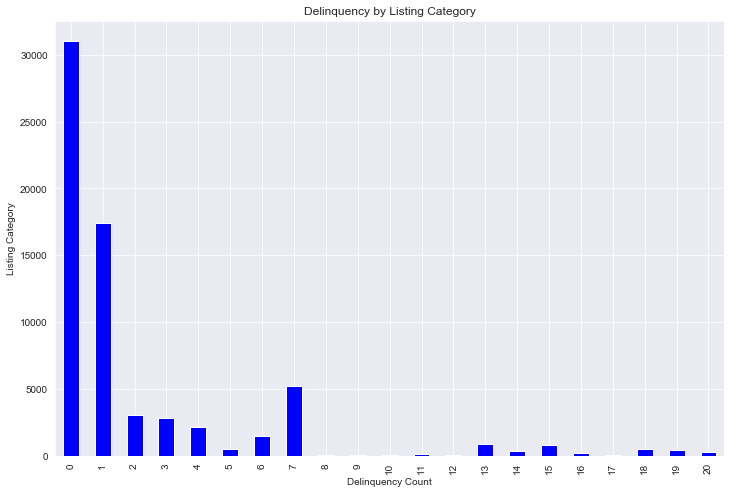

In [65]:
# # Plot delinquencies by listing category
# level_order2 = ['Not Available','Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Auto',
#                'Household Expenses', 'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans', 'Vacation',  'Student Use', 
#                'Motorcycle', 'Engagement Ring', 'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
# ord_cat2 = pd.api.types.CategoricalDtype(ordered=True, categories=level_order2)
# prosper.ListingCategory = prosper.ListingCategory.astype(ord_cat2)

cat_del = prosper.groupby('ListingCategory').sum().CurrentDelinquencies
plt.figure(figsize = [12, 8])
cat_del.plot(kind="bar", color="blue");
plt.title('Delinquency by Listing Category')
plt.xlabel('Delinquency Count')
plt.ylabel('Listing Category');

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

From the bar chart we can see that the most delinquent Listing category are those not available followed by Debt consolidation. The least is wedding loans.

In [ ]:
#archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

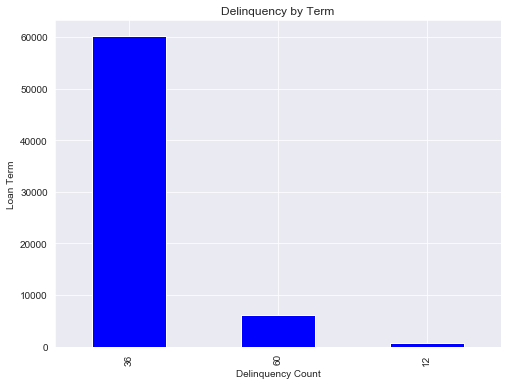

In [67]:
# Delinquency by loan term
# Convert loan term to categorical data type
#level = ['36', '60', '12']
#cat = pd.api.types.CategoricalDtype(ordered=True, categories=level)
prosper.Term = prosper.Term.astype('category')

term_del = prosper.groupby('Term').sum().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [8, 6])
term_del.plot(kind="bar", color="blue");
plt.title('Delinquency by Term')
plt.xlabel('Delinquency Count')
plt.ylabel('Loan Term');

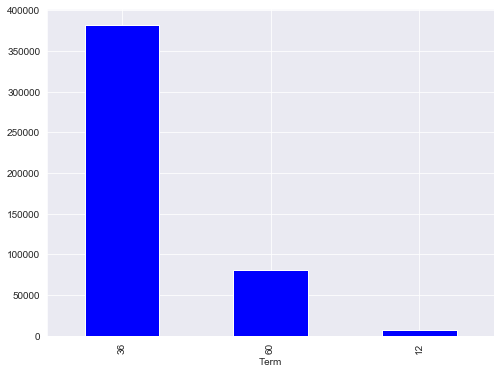

In [69]:
# Lets see if the trend is different for Delinquency by loan term over 7 years
term_del7 = prosper.groupby('Term').sum().DelinquenciesLast7Years.sort_values(ascending=False)
plt.figure(figsize = [8, 6])
term_del7.plot(kind="bar", color="blue");
plt.xlabel('Delinquency Count')
plt.ylabel('Term');

The overwelming number of delinquent loans are those with a term of 36 months.

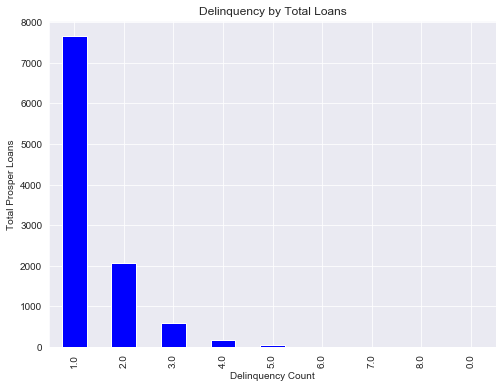

In [70]:
# Delinquency by number of loans
loans_del = prosper.groupby('TotalProsperLoans').sum().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [8, 6])
loans_del.plot(kind="bar", color="blue");
plt.title('Delinquency by Total Loans')
plt.xlabel('Delinquency Count')
plt.ylabel('Total Prosper Loans');

It appears those with no prior prosper loans that is only 1 loan are the most delinquent followed by 2, 3, 4 respectively. The higher the number of loans the less likelyhood of deliquency.

In [ ]:
prosper.DebtToIncomeRatio.value_counts()
# term_ratio = prosper.groupby('Term').sum().TotalProsperLoans
# plt.figure(figsize = [8, 6])
# term_ratio.plot(kind="bar", color="blue");

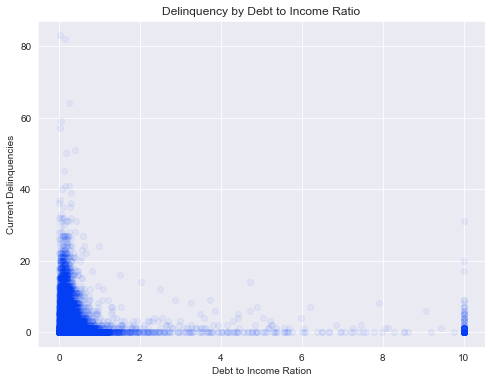

In [96]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='DebtToIncomeRatio', y='CurrentDelinquencies', alpha=1/20)
plt.title('Delinquency by Debt to Income Ratio')
plt.xlabel('Debt to Income Ration')
plt.ylabel('Current Delinquencies');

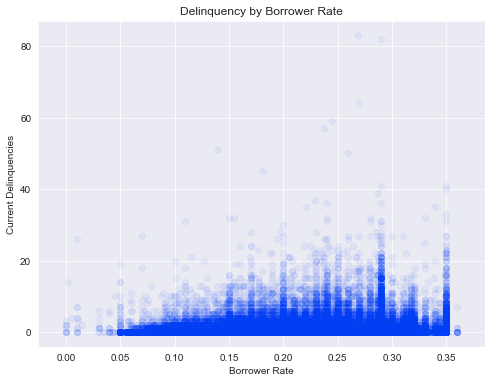

In [81]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='BorrowerRate', y='CurrentDelinquencies', alpha=1/20)
plt.title('Delinquency by Borrower Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Current Delinquencies');

As the Borrower rate increase, the delinquency is also increasing showing a good positive relationship

In [82]:
np.log10(prosper['CurrentDelinquencies'].describe())

C:\Users\max\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.054000
mean    -0.227640
std      0.296381
min          -inf
25%          -inf
50%          -inf
75%          -inf
max      1.919078
Name: CurrentDelinquencies, dtype: float64

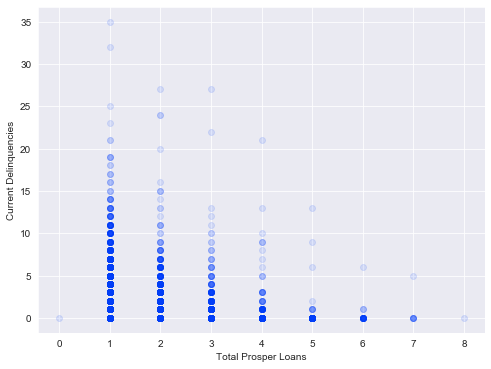

In [85]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='TotalProsperLoans', y='CurrentDelinquencies', alpha=1/9)
plt.title('Delinquency by Prosper Loans')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Current Delinquencies');

As the number of loans increase, delinquency reduces which indicates negative relationship. Those with smaller amounts of loans have more delinquents. Perform log 10

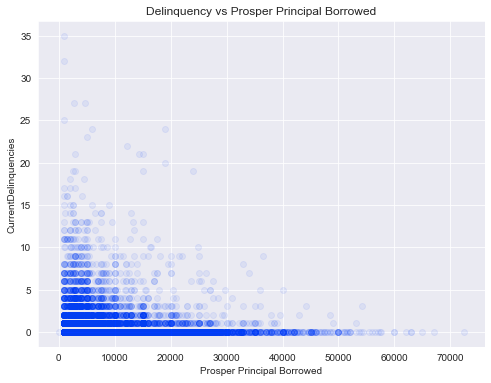

In [89]:
# Relationship between Principal  and Current Delinquencies
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='ProsperPrincipalBorrowed', y='CurrentDelinquencies', alpha=1/15);
plt.title('Delinquency vs Prosper Principal Borrowed')
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('CurrentDelinquencies');

The relationship between the Principal Borrowed and Current Delinquencies is a negative one. As the Principal Borrowed increased, the rate of Delinquency reduced. Higher value loans are less delinquent

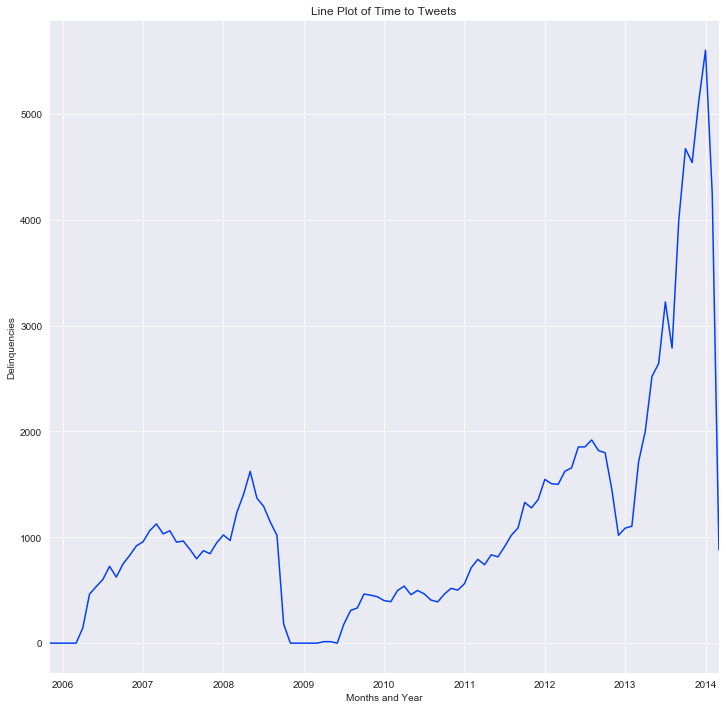

In [93]:
# Delinquencies by year
#Convert Listing creation date to datetime
prosper.ListingCreationDate =  pd.to_datetime(prosper['ListingCreationDate'])
# Get number of tweets per month
month_del = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).count().CurrentDelinquencies
month_del.plot(kind='line', figsize=(12,12))
plt.xlabel('Months and Year')
plt.ylabel('Delinquencies')
plt.title('Line Plot of Time to Tweets');

Delinquencies were on the rise from 2006 up to sometime in 2008. They then dropped up to 2009 before rising consistently up till 2012 when it dipped again. It continued to rise in 2013.


We have seen relationships between Current Delinquencies and Income range, state, listing category, term, total prosper loans, debt to income ratio, borrower rate, principal borrowed and listing date.

### What affects prosper score and corr with interest rate OR What affects outcome of lenders yield

In [97]:
#The prosper score is rated between 1 - 10. Remove all that dont fall into that category
prosper = prosper.query('ProsperScore <= 10')

In [ ]:
# Convert to categorical data type
prosper.ProsperScore = prosper.ProsperScore.astype('category')

In [ ]:
# Lets check other columns correlation with Prosper score
prosper[prosper.columns[0:40]].corrwith(prosper['ProsperScore'])

In [ ]:
prosper.ProsperScore.value_counts()

In [ ]:
# status_means = prosper.groupby('LoanStatus').sum()
# year_order = status_means.sort_values('year', ascending = False).index

# g = sb.FacetGrid(data = prosper, col = 'LoanStatus', col_wrap = 3, size = 2, col_order = year_order)
# # try sb.distplot instead of plt.hist to see the plot in terms of density!
# g.map(plt.bar, 'year', bins = np.arange(2009, prosper['year'].max()+1, 1))
# g.set_titles('{col_name}');

In [99]:
# Extract year from listing date and add new column to listing date
prosper['year'] = prosper['ListingCreationDate'].dt.year

C:\Users\max\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
prosper.year.value_counts()

2013    34524
2012    19556
2011    11442
2014    10167
2010     5530
2009     2178
Name: year, dtype: int64

In [ ]:
prosper.LoanStatus.value_counts()

In [ ]:
prosper.IncomeRange.value_counts()

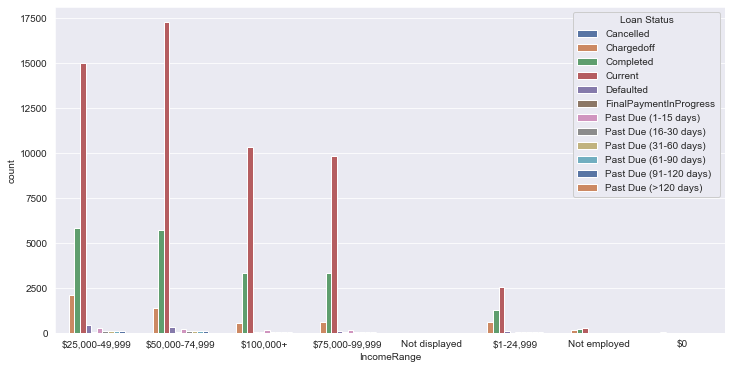

In [103]:
# Explore loan status by income range
plt.figure(figsize = [12, 6])
ax = sb.countplot(data = prosper, x = 'IncomeRange', hue = 'LoanStatus', palette = 'deep')
ax.legend(loc = 1, framealpha = 5, title = 'Loan Status');

50 to 75k have the most current loans. 25 to 50k have the most completed. thos with no income displayed have the most defaults

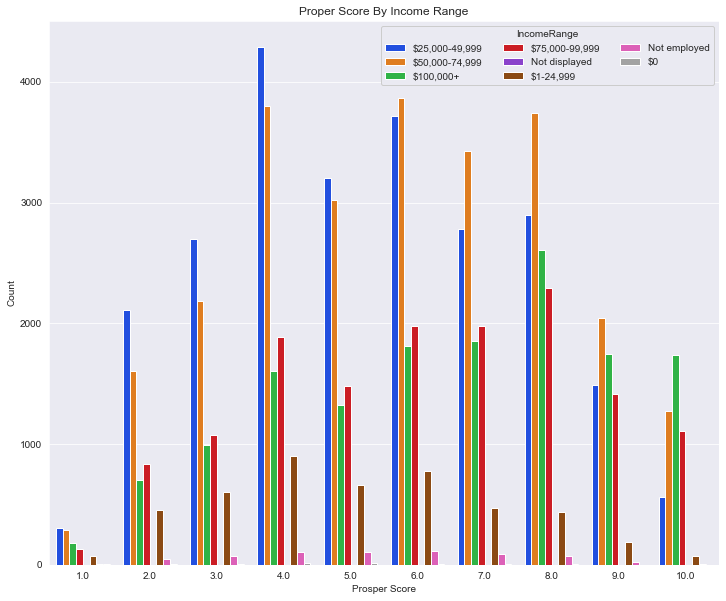

In [113]:
plt.figure(figsize = [12, 10])
ax = sb.countplot(data = prosper, x = 'ProsperScore', hue = 'IncomeRange')
ax.legend(loc = 0, ncol = 3, framealpha = 1, title = 'IncomeRange');
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Proper Score By Income Range');

The income range of 25k to 49k are highest for lower prosper scores 5 to 1. However for the higher scores between 6 and 7 its 50 to 74k that are on top. the 100k top also have high prosper scores peaking at 8. The 1k to 24k range peaked at prosper score 4 and kept declining up to 10

In [ ]:
# ct_counts = prosper.groupby(['IncomeRange', 'ProsperScore']).size()
# ct_counts = ct_counts.reset_index('count')
# ct_counts = ct_counts.pivot(index = 'ProsperScore', columns = 'IncomeRange', values = 'count')
# sb.heatmap(ct_counts, annot = True, fmt = 'd')

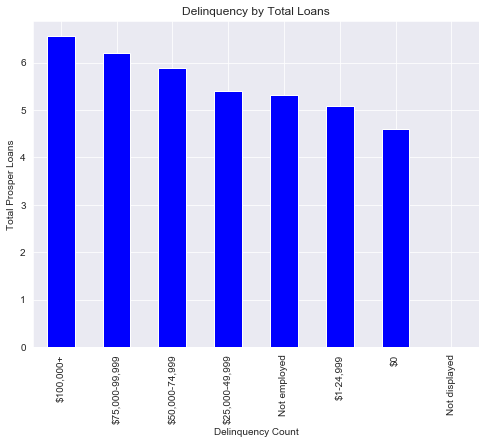

In [116]:
# Prosper score by income range
pros_income = prosper.groupby('IncomeRange').mean().ProsperScore.sort_values(ascending=False)

plt.figure(figsize = [8, 6])
pros_income.plot(kind="bar", color="blue");
plt.title('Prosper Score by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Mean Prosper Score');

As expected those with 100k or more had the highest mean prosper score and it continues to decrease as income decrease. Will be interesting to add home owners and states in multivariate to see they fare

In [ ]:
prosper.info()

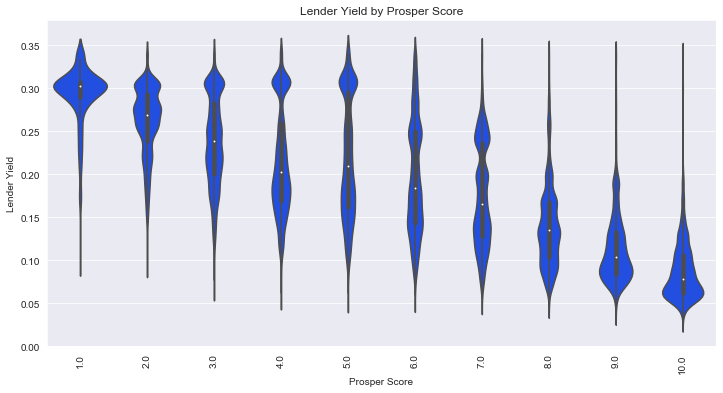

In [121]:
# Prosper score and loan status
plt.figure(figsize = [12, 6])
sb.violinplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', color = base_color)
plt.xticks(rotation=90)
plt.title('Lender Yield by Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield');

The lower the Prosper Score the higher the Lenders Yield and the higher the Prosper score the lower the yield. Riskier loans have higher lender yields

Those who have completed payments also have the highest mean prosper score.

In [119]:
#Convert to categorical
prosper.EmploymentStatus = prosper.EmploymentStatus.astype('category')
prosper.EmploymentStatus.value_counts()

Employed         65945
Full-time         7913
Self-employed     4495
Other             3772
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

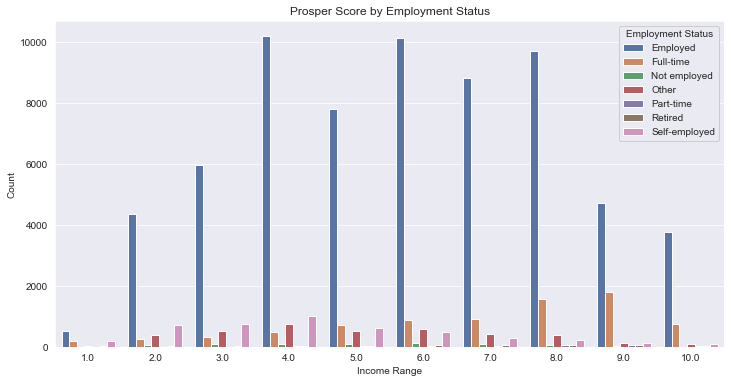

In [122]:
# Explore Prosper Score by Employement status
plt.figure(figsize = [12, 6])
ax = sb.countplot(data = prosper, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'deep')
ax.legend(loc = 1, framealpha = 5, title = 'Employment Status')
plt.title('Prosper Score by Employment Status')
plt.xlabel('Income Range')
plt.ylabel('Count');

The employed have the highest numbers across all scores followed by those with full time employment. The unemployed, part-time and retired barely show up in the prosper score count.

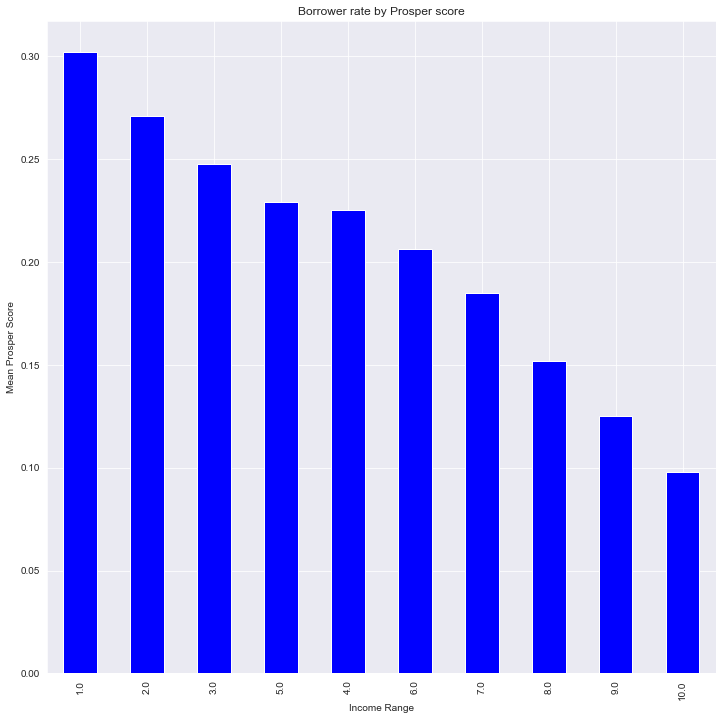

In [123]:
# Relationship between borrower  rate and prosper score
prosper_rate = prosper.groupby('ProsperScore').mean().BorrowerRate.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
prosper_rate.plot(kind="bar", color="blue")
plt.title('Borrower rate by Prosper score')
plt.xlabel('Prosper score')
plt.ylabel('Borrower Rate');

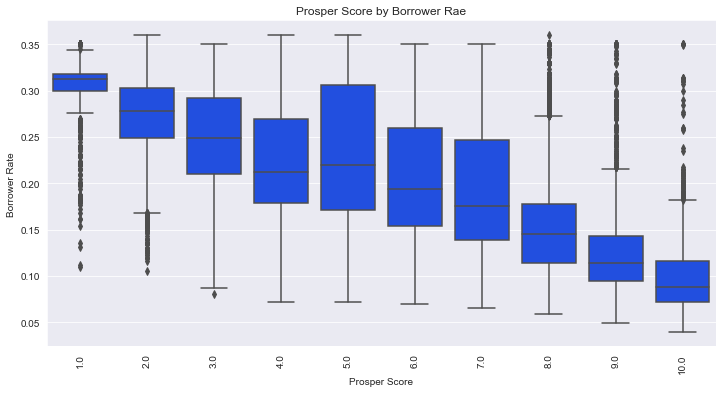

In [125]:
# Relationship between borrower  rate and prosper score
plt.figure(figsize = [12, 6])
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation=90)
plt.title('Prosper Score by Borrower Rae')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate');

Unsuprinsingly those with higher prosper scores are given lower interest rates. There is only a slight glitch between 5 and 4 then continues dropping until prosper score 10. There are outliers on both sides of the scores

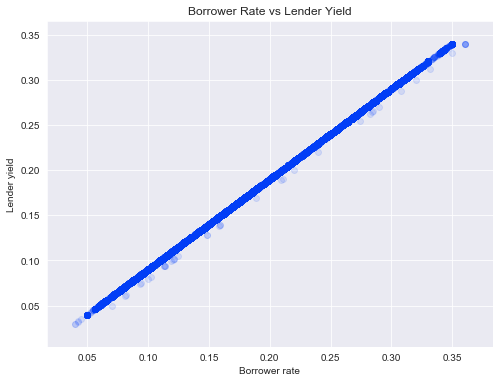

In [127]:
# Relationship between Borrower rate  and Lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='BorrowerRate', y='LenderYield', alpha=1/9);
plt.xlabel('Borrower rate')
plt.ylabel('Lender yield')
plt.title('Borrower Rate vs Lender Yield');

Shows a strong positive relationship where lender yield increases with borrower rate increase

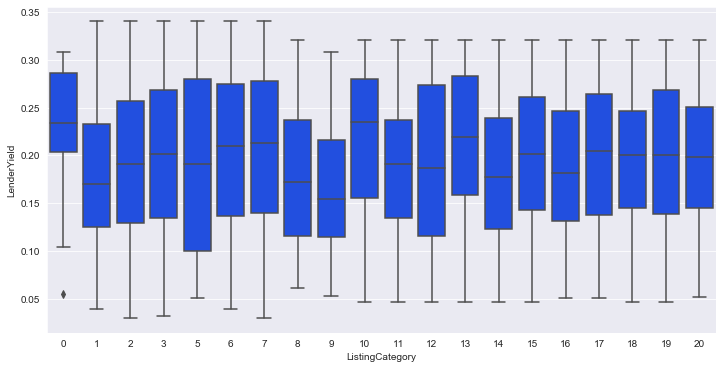

In [131]:
# Prosper score and listing category
plt.figure(figsize = [12, 6])
sb.boxplot(data = prosper, x = 'ListingCategory', y = 'LenderYield', color = base_color);

Cosmetic proceedures have highest Lender yield and the lowest is boat

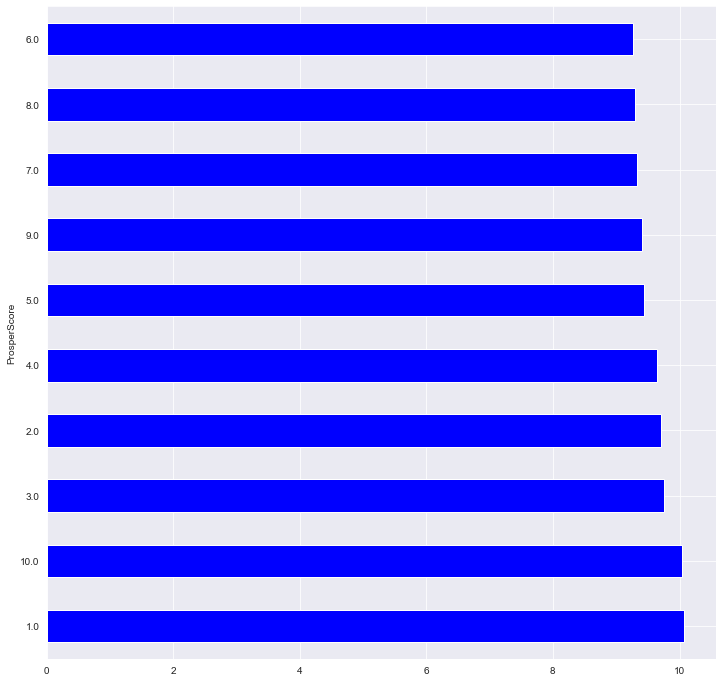

In [133]:
#prosper.OpenCreditLines.value_counts()
ocl_ps = prosper.groupby('ProsperScore').mean().OpenCreditLines.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
ocl_ps.plot(kind="barh", color="blue");

This doesnt tell us that much because both high and low prosper scores have many open credit lines

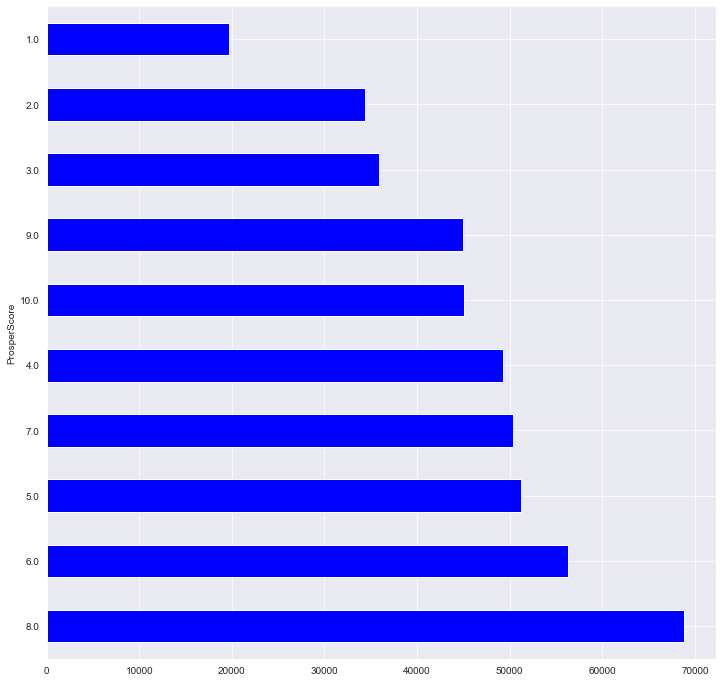

In [134]:
# Prosper score by total prosper payments billed
tpp_ps = prosper.groupby('ProsperScore').sum().TotalProsperPaymentsBilled.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
tpp_ps.plot(kind="barh", color="blue");

This is also a mixed bag. There isnt a clear pattern with higher or lower prosper scores having more billed payments

In [ ]:
prosper.TotalProsperLoans.value_counts()

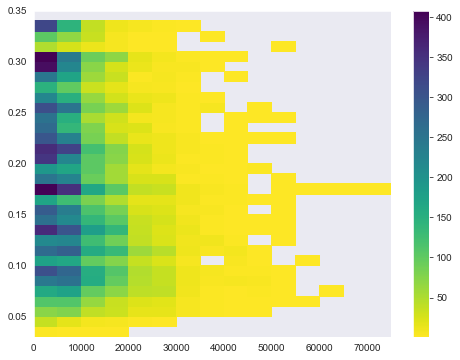

In [137]:
# Lets take a look at lenders yield and principal borrowed
plt.figure(figsize = [8, 6])
bins_x = np.arange(0, 72499+5000, 5000)
bins_y = np.arange(0.03, 0.34+0.01, 0.01)
plt.hist2d(data = prosper, x = 'ProsperPrincipalBorrowed', y = 'LenderYield',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();

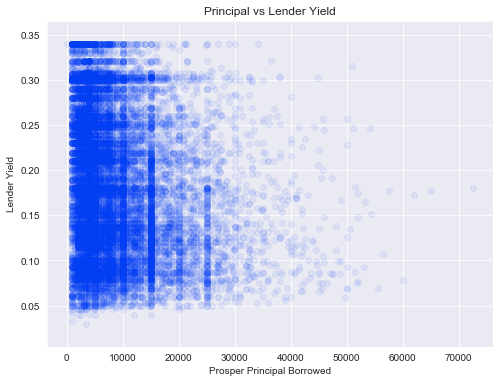

In [138]:
# Relationship between Principal  and Lender Yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='ProsperPrincipalBorrowed', y='LenderYield', alpha=1/15);
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('Lender Yield')
plt.title('Principal vs Lender Yield');

Most loans are below $30,000 and offer a variety of yields. 30 to 40k have a moderate amount of loans. The higher loans occur less often and have lower yields

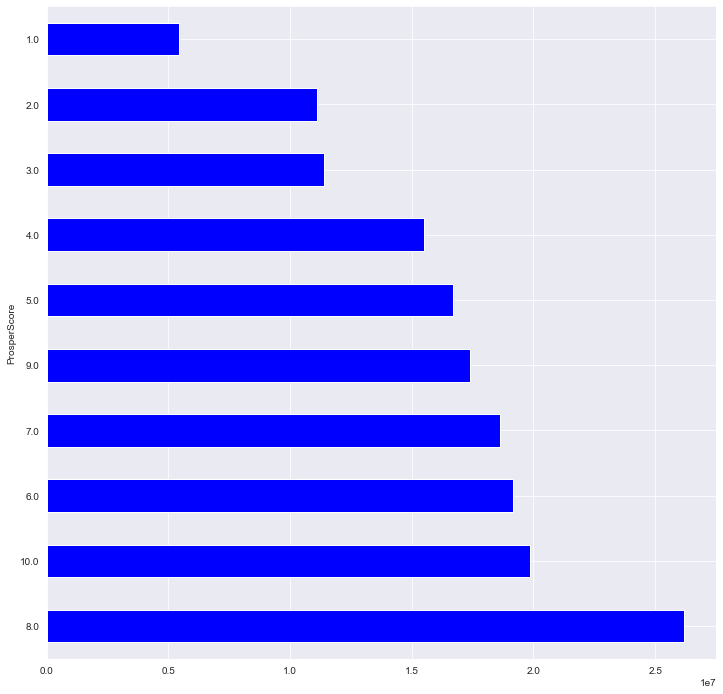

In [142]:
tpp_ps = prosper.groupby('ProsperScore').sum().ProsperPrincipalBorrowed.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
tpp_ps.plot(kind="barh", color="blue");

Those with prosper scores between 6 and 10 borrowed more than 1 to5

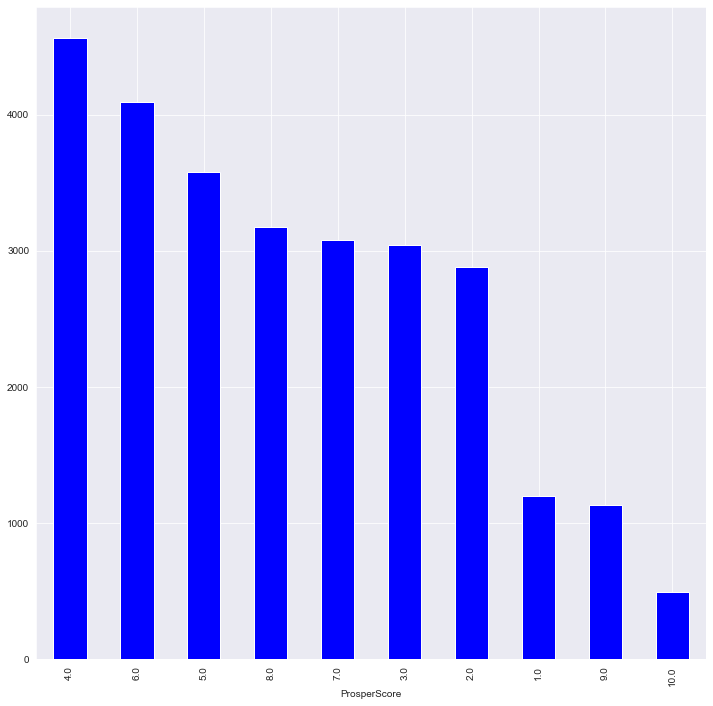

In [143]:
# Lets see how prosper score categories fare with delinquencies
cd_ps = prosper.groupby('ProsperScore').sum().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
cd_ps.plot(kind="bar", color="blue")
plt.xlabel('Prosper Score')
plt.ylabel('Mean Delinquencies')
plt.title('Delinquencies by Prosper Score');


Those with a prosper score of 9 and 10 have the lowest number of delinquencies. You would expect other high scores to have lower delinquencies but it seems to be a mixed bag.

In [ ]:
# plt.figure(figsize = [12, 6])
# #xlog_data = np.log10(prosper.BorrowerRate)
# ylog_data = np.log10(prosper.LenderYield)
# #xlog_bin = np.arange(0, 5+0.1, 0.1)
# #plt.xticks(xlog_bin)
# ylog_bin = np.arange(0.03, 0.34+0.1, 0.1)
# plt.yticks(ylog_bin)
# plt.scatter(data=prosper, x='EstimatedReturn', y=ylog_data, alpha = 1/5)
# plt.title('Favorite and Retweet Count Log transform scatter plot')
# plt.xlabel('Favorite Count')
# plt.ylabel('Retweet Count');

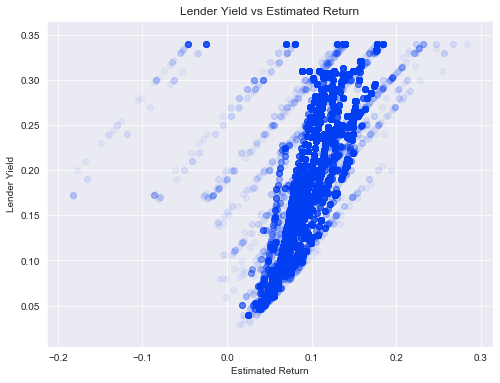

In [145]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='EstimatedReturn', y='LenderYield', alpha=1/20);
plt.xlabel('Estimated Return')
plt.ylabel('Lender Yield')
plt.title('Lender Yield vs Estimated Return');

The seems to be a good positive relationship between estimated return and lender yield. The lender yield increases as the estimated return increases

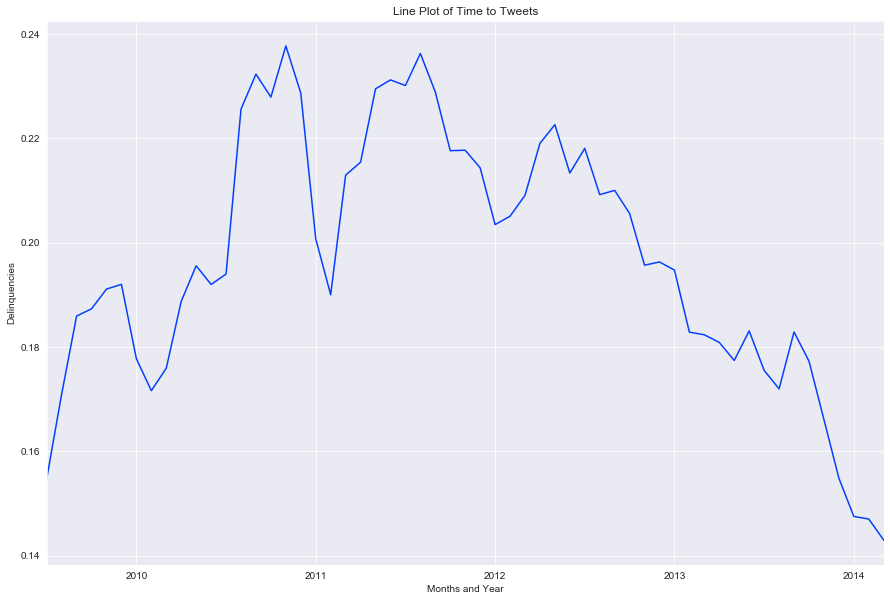

In [146]:
# Delinquencies by year
# Get number of tweets per month
month_yield = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().LenderYield
month_yield.plot(kind='line', figsize=(15,10))
plt.xlabel('Months and Year')
plt.ylabel('Delinquencies')
plt.title('Line Plot of Time to Tweets');

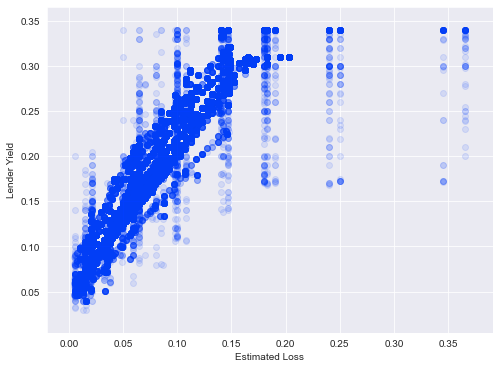

In [148]:
# Relationship between Principal  and Lender Yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='EstimatedLoss', y='LenderYield', alpha=1/10);
plt.xlabel('Estimated Loss')
plt.ylabel('Lender Yield');

### MULTIVARIATE ANALYSIS

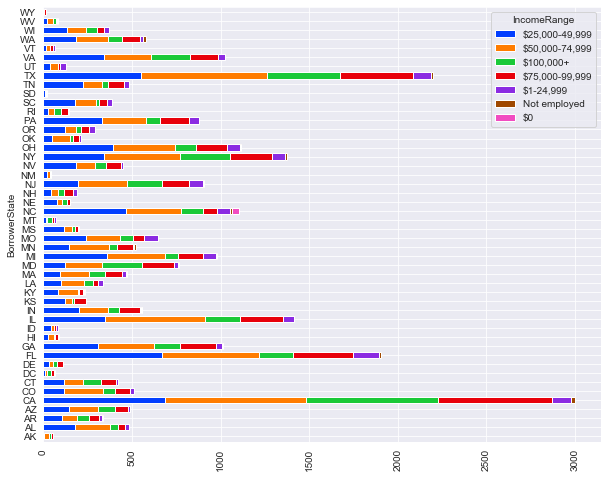

In [149]:
# Lets add Income Range to the Delinquencies by State
bic = (prosper.pivot_table(index='BorrowerState', columns='IncomeRange', values='CurrentDelinquencies', aggfunc='sum'))
bic.plot(kind='barh', stacked=True, figsize=(10,8), width= 0.7)
plt.xticks(rotation=90);

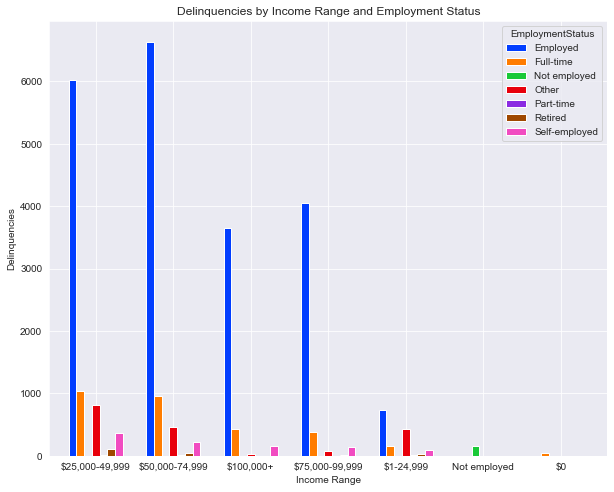

In [154]:
# Lets add Employement status to the Delinquencies by Income range
iec = (prosper.pivot_table(index='IncomeRange', columns='EmploymentStatus', values='CurrentDelinquencies', aggfunc='sum'))
iec.plot(kind='bar', stacked=False, figsize=(10,8), width= 0.7)
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Employment Status');

The employed have the highest numbers of deliquencies across all income groups. The unemployed hardly feature because most loans are given to those with jobs or verifiable means of payback. Nothing much to do with this information as data is heavily skewed towards the employed

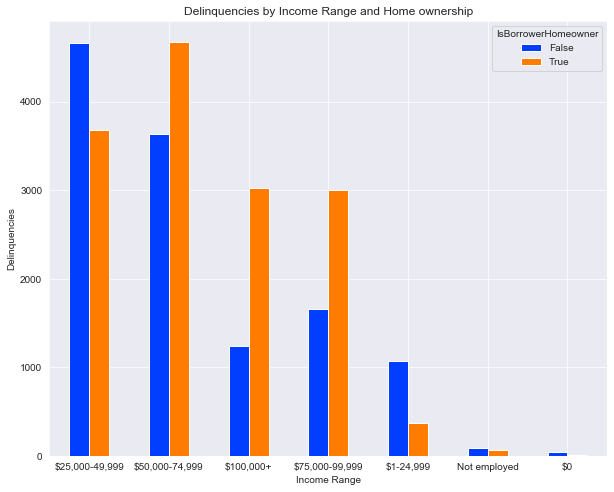

In [155]:
# Lets add Homeowner status to the Delinquencies by Income range
tde = (prosper.pivot_table(index='IncomeRange', columns='IsBorrowerHomeowner', values='CurrentDelinquencies', aggfunc='sum'))
tde.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Home ownership');

For the 25k to 49k and 1k to 24k income groups, those with no homes fail to pay their loans more. This trend reversed in the 50k t0 74k, 75k to 99k and even 100k+ income group. Lower income groups with no homes have more delinquencies than higher income groups with homes

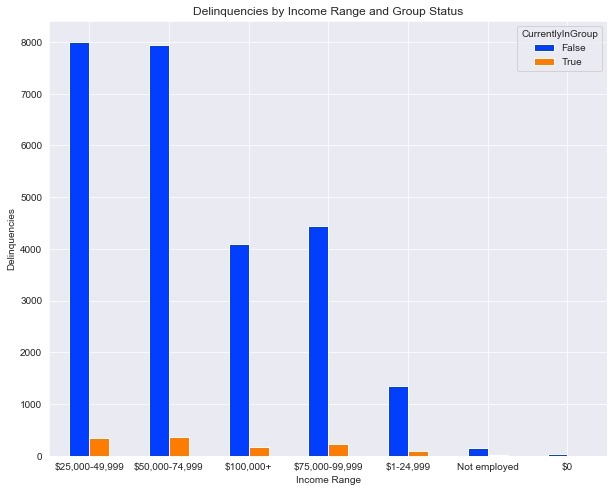

In [157]:
# Lets add Group status to the Delinquencies by Income range
tde = (prosper.pivot_table(index='IncomeRange', columns='CurrentlyInGroup', values='CurrentDelinquencies', aggfunc='sum'))
tde.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Group Status');

Those not in groups are overwhelminly more deliquent that those in groups when listing was made across all income streams

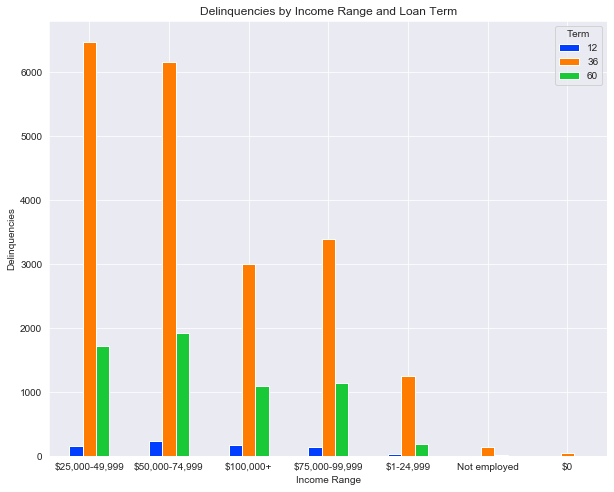

In [159]:
# Lets add loan Term to the Delinquencies by Income range
tde = (prosper.pivot_table(index='IncomeRange', columns='Term', values='CurrentDelinquencies', aggfunc='sum'))
tde.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Loan Term');

Loans with 36 month durations are the most delinquent across all the income groups. The 60 month loans are the 2nd most delinquent in all income groups. The least delinquent are shorter term loans of 12 months.

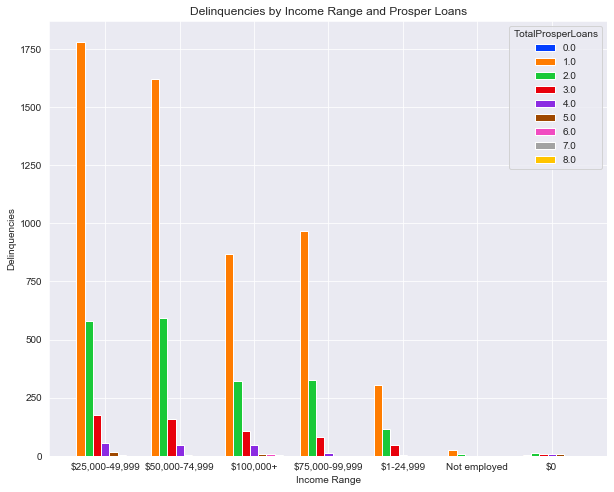

In [161]:
# Lets add Total Prosper loans to the Delinquencies by Income range

tde = (prosper.pivot_table(index='IncomeRange', columns='TotalProsperLoans', values='CurrentDelinquencies', aggfunc='sum'))
tde.plot(kind='bar', stacked=False, figsize=(10,8), width=1)
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Prosper Loans');

Those with only 1 loan and therefore have no history of prosper loans are the most delinquent. It appears that the more history you have with prosper the lower the prospect of delinquency

In [ ]:
prosper.BorrowerRate.value_counts()

In [ ]:
# # Lets add Employement status to the Delinquencies by Income range
# tde = (prosper.pivot_table(index='IncomeRange', columns='ProsperPrincipalBorrowed', values='CurrentDelinquencies', aggfunc='sum'))
# tde.plot(kind='bar', stacked=False, figsize=(10,8))
# plt.xticks(rotation=90);

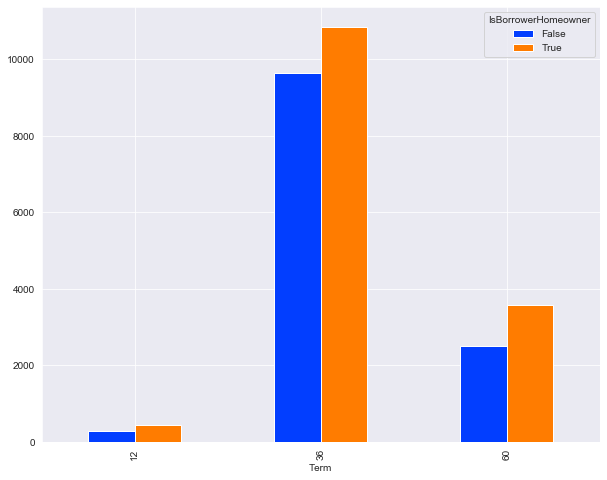

In [162]:
s = (prosper.pivot_table(index='Term', columns='IsBorrowerHomeowner', values='CurrentDelinquencies', aggfunc='sum'))
s.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=90);

36 month term loans are the most delinquent for home and non home owners. The home owners have more delinquencies overall

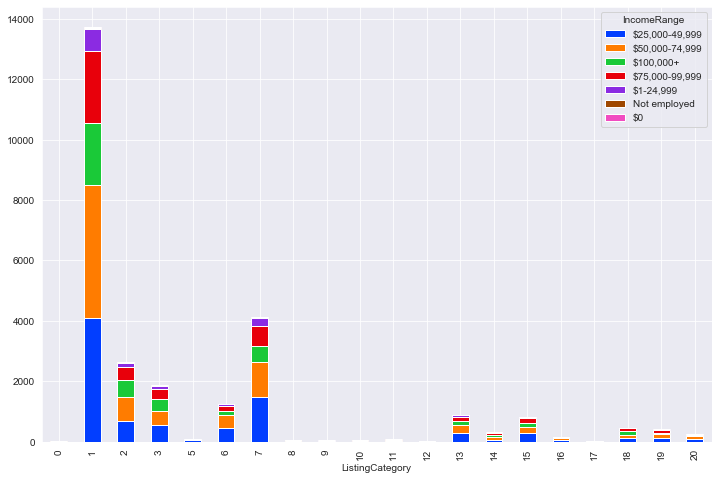

In [163]:
b = (prosper.pivot_table(index='ListingCategory', columns='IncomeRange', values='CurrentDelinquencies', aggfunc='sum'))
b.plot(kind='bar', stacked=True, figsize=(12,8))
plt.xticks(rotation=90);

<Figure size 576x432 with 0 Axes>

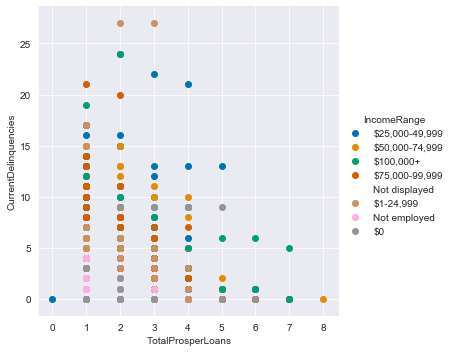

In [170]:
# Add income range to Total prosper loans and Delinquencies
plt.figure(figsize = [8, 6]);
g = sb.FacetGrid(data = prosper, hue = 'IncomeRange', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'TotalProsperLoans', 'CurrentDelinquencies')
g.add_legend();

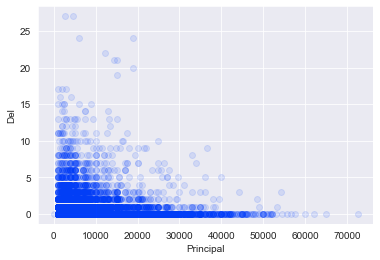

In [165]:
# Relationship between estimated return and lender yield
plt.scatter(data=prosper, x='ProsperPrincipalBorrowed', y='CurrentDelinquencies', alpha=1/9);
plt.xlabel('Principal')
plt.ylabel('Del');

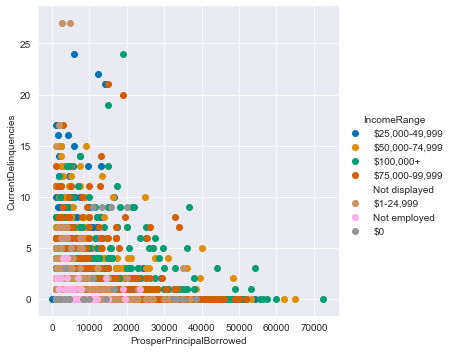

In [166]:
# Principal borrowed and Deliquencies by Income Range
g = sb.FacetGrid(data = prosper, hue = 'IncomeRange', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'ProsperPrincipalBorrowed', 'CurrentDelinquencies')
g.add_legend();

The above scatter plot seems confusing. Lets try a different approach

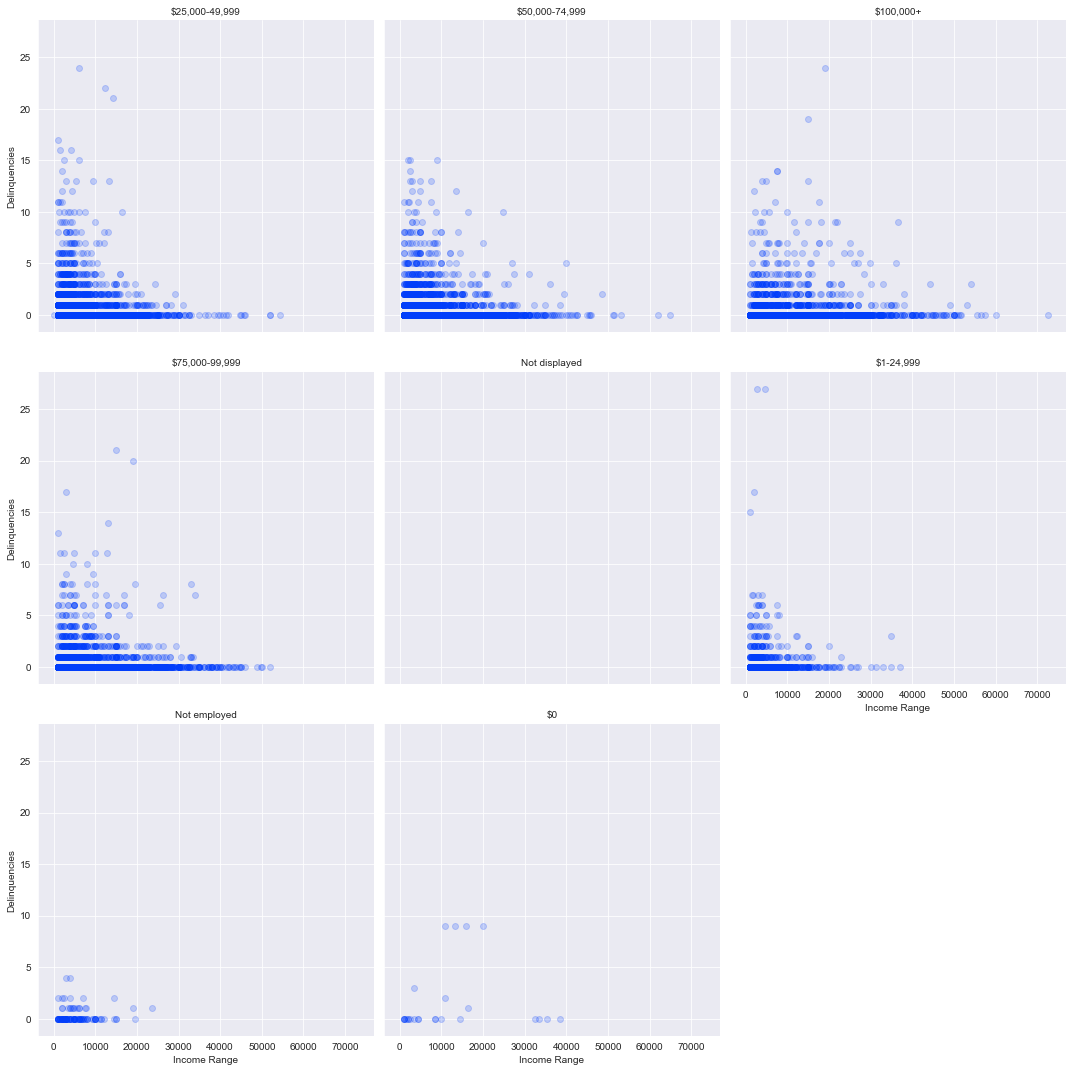

In [174]:
# Principal borrowed and Deliquencies by Income Range
g = sb.FacetGrid(data = prosper, col = 'IncomeRange', height = 5, col_wrap = 3, margin_titles = True)
g.map(plt.scatter, 'ProsperPrincipalBorrowed', 'CurrentDelinquencies', alpha = 1/5);
g.set_ylabels('Delinquencies')
g.set_xlabels('Income Range')
g.set_titles('{col_name}');

Principal borrowed and Deliquencies by Income Range have a negative relationship even after the Income Range is added as a 3rd variable. The $0 income range has few entries so its difficult to make conclusions

In [ ]:
prosper.info()

### 2

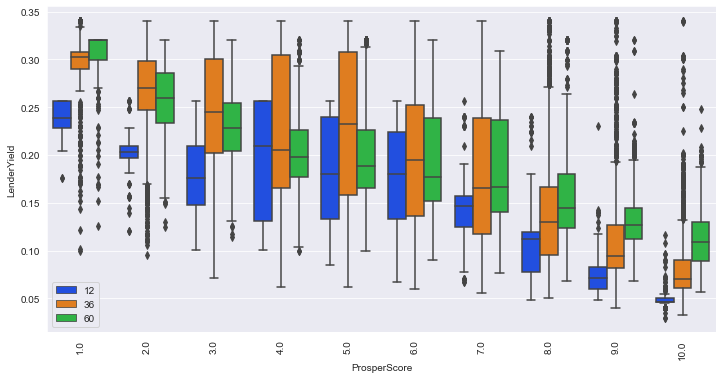

In [175]:
# Prosper score and loan status
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'Term')
plt.xticks(rotation=90)
plt.legend(loc=0);

Prosper score bewteen 7 and 10, the best average yields are for those loans that are 60 months long. For prosper scores 1, 2, 3, 5 and 6, loans with 36 months tenure have better yields. Its only Prosper score 4 that has the best yield on 12 month loans

In [ ]:
# Prosper score and loan status
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'IsBorrowerHomeowner')
plt.xticks(rotation=90)
plt.legend(loc=0);

For every prosper score the average Lender yield is lower for homeowners. The only exception is the prosper score 1 where the homeowner loan has a higher average yield than the borrower without a home.

In [ ]:
# Prosper score and loan status
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'CurrentlyInGroup')
plt.xticks(rotation=90)
plt.legend(loc=0);

The prosper score of 2 to 7, lenders yield is higher when the borrower is in a group. This is however different for all other prosper scores where those not in a group offer better yields for the lender.

In [ ]:
# Prosper score and listing category
#prosper2 = prosper.query('ProsperScore <= 10')
plt.figure(figsize = [12, 6])
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'BorrowerRate', hue='IsBorrowerHomeowner');

In [ ]:
# Explore loan status by income range
pib = (prosper.pivot_table(index='ProsperScore', columns='IsBorrowerHomeowner', values='BorrowerRate', aggfunc='mean'))
pib.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=90);

The borrower rate is lower for all Prosper scores with homes. The only exception is Prosper score 1 were homeowners get a higher rate.

In [ ]:
# Lets add Prosper score to the Relationship between estimated return and lender yield
# plt.scatter(data=prosper, x='EstimatedReturn', y='LenderYield', alpha=1/20);
# plt.xlabel('Estimated Return')
# plt.ylabel('Lender Yield');

g = sb.FacetGrid(data = prosper, col = 'ProsperScore', height = 5, col_wrap = 3, margin_titles = True)
g.map(plt.scatter, 'EstimatedReturn', 'LenderYield', alpha = 1/5);

The estimated return and the Lender yeild have a positive relationship. Its the same for all prosper scores

In [ ]:
# Prosper score and lender yeild by year
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'year')
plt.xticks(rotation=90)
plt.legend(loc=0);

In [ ]:
# Lets get average monthly Lenders yield
month_yield = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().LenderYield

In [ ]:
# Lets get average monthly Estimated return
month_return = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().EstimatedReturn

In [ ]:
plt.figure(figsize=(12, 8)) 
month_yield.plot(kind='line')
month_return.plot(kind='line')
plt.xlabel('Year and Month')
plt.ylabel('Lenders Yield and Estimated Return')
plt.legend();
plt.title('Line Plot of Time vs Tweets vs (Retweets/1000)');

From the line chart the Lenders Yield is always higher than the estimated return for all the years plotted

In [ ]:
prosper.EmploymentStatus.value_counts()